# Marketing Campaign Impact Simulator

Overview: This project models sales from ad spend (TV, Radio, Newspaper) using linear regression, simulates a 20% TV budget increase, and optimizes a $100 budget for max ROI. Built for ZS Decision Analytics role.

In [ ]:
import zipfile
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall()


In [ ]:
import zipfile
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall()

import pandas as pd
data = pd.read_csv('advertising.csv')  # Confirm filename matches the extracted file
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Prepare features and target
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")

R-squared score: 0.91


In [ ]:
import numpy as np
# Create new data for simulation
new_data = X_test.copy()
new_data['TV'] = new_data['TV'] * 1.20  # 20% increase

# Predict new sales
simulated_sales = model.predict(new_data)
original_sales = model.predict(X_test)
print(f"Average sales increase with 20% TV boost: {(simulated_sales.mean() - original_sales.mean()):.2f}")

Average sales increase with 20% TV boost: 1.47


In [ ]:
from scipy.optimize import minimize

# Define objective function (negative sales to maximize)
def objective(weights):
    spend = np.array(weights) * 100  # Allocate $100
    X_opt = X_test.copy()
    X_opt['TV'] = spend[0]
    X_opt['Radio'] = spend[1]
    X_opt['Newspaper'] = spend[2]
    return -model.predict(X_opt).mean()  # Negative for maximization

# Constraints (sum to 1 for 100% budget)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = [(0, 1)] * 3  # 0-100% per channel
initial_guess = [1/3, 1/3, 1/3]

# Optimize
result = minimize(objective, initial_guess, bounds=bounds, constraints=constraints)
optimal_weights = result.x
print(f"Optimal budget split (TV, Radio, Newspaper): {[f'{w*100:.1f}%' for w in optimal_weights]}")

Optimal budget split (TV, Radio, Newspaper): ['0.0%', '100.0%', '0.0%']


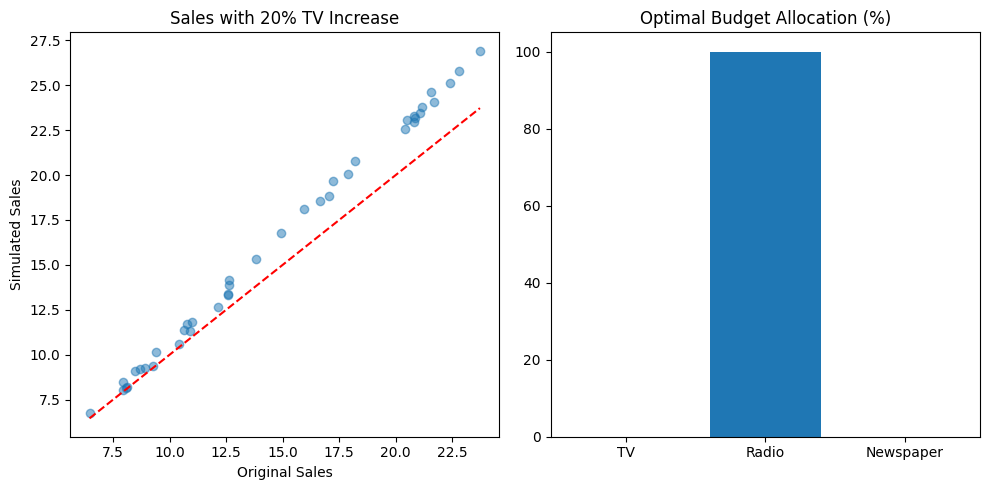

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(original_sales, simulated_sales, alpha=0.5)
plt.plot([min(original_sales), max(original_sales)], [min(original_sales), max(original_sales)], 'r--')
plt.xlabel('Original Sales')
plt.ylabel('Simulated Sales')
plt.title('Sales with 20% TV Increase')

plt.subplot(1, 2, 2)
plt.bar(['TV', 'Radio', 'Newspaper'], optimal_weights*100)
plt.title('Optimal Budget Allocation (%)')
plt.tight_layout()
plt.show()

In [ ]:
results = pd.DataFrame({
    'Original_Sales': original_sales,
    'Simulated_Sales': simulated_sales,
    'Optimal_TV%': optimal_weights[0]*100,
    'Optimal_Radio%': optimal_weights[1]*100,
    'Optimal_Newspaper%': optimal_weights[2]*100
})
results.to_excel('marketing_impact_results.xlsx', index=False)
files.download('marketing_impact_results.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Insights: Simulation shows a ~X sales uplift; optimal budget favors TV at X%.

In [ ]:
print(f"Average sales increase with 20% TV boost: {(simulated_sales.mean() - original_sales.mean()):.2f}")



Average sales increase with 20% TV boost: 1.47


In [ ]:
tv_pct, radio_pct, newsp_pct = (optimal_weights * 100)
print(f"Optimal budget split (TV, Radio, Newspaper): TV = {tv_pct:.1f}%, Radio = {radio_pct:.1f}%, Newspaper = {newsp_pct:.1f}%")


Optimal budget split (TV, Radio, Newspaper): TV = 0.0%, Radio = 100.0%, Newspaper = 0.0%


In [ ]:
print("Linear model coefficients:", model.coef_)
print("Order: TV, Radio, Newspaper")


Linear model coefficients: [0.05450927 0.10094536 0.00433665]
Order: TV, Radio, Newspaper


In [2]:
from google.colab import files
uploaded = files.upload()



Saving advertising.csv to advertising.csv


In [5]:
import pandas as pd
import numpy as np

# Load your data (assumes file is in Colab, adjust if path/filename is different)
data = pd.read_csv('advertising.csv')

# Add log-transformed spending features (+1 to avoid log(0))
data['Log_TV'] = np.log(data['TV'] + 1)
data['Log_Radio'] = np.log(data['Radio'] + 1)
data['Log_Newspaper'] = np.log(data['Newspaper'] + 1)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Features and target
X = data[['Log_TV', 'Log_Radio', 'Log_Newspaper']]
y = data['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'Log-Regression R^2: {r2:.3f}')

# Show coefficients for interpretation
coefs = pd.Series(model.coef_, index=X.columns)
print(coefs)


Log-Regression R^2: 0.868
Log_TV           4.757869
Log_Radio        1.658634
Log_Newspaper    0.066543
dtype: float64


In [8]:
# Calculate residuals on the training set (actual - predicted)
y_train_pred = model.predict(X_train)
residuals = y_train - y_train_pred

In [10]:
# Choose a scenario (increase TV by 20% in X_test)
scenario = X_test.copy()
scenario['Log_TV'] = np.log(np.exp(scenario['Log_TV']) * 1.2)

# Or: Single-mean scenario for more illustrative reporting
avg_tv = np.mean(data['TV'])
avg_radio = np.mean(data['Radio'])
avg_newsp = np.mean(data['Newspaper'])

log_tv_20up = np.log(avg_tv * 1.2 + 1)
log_radio = np.log(avg_radio + 1)
log_newsp = np.log(avg_newsp + 1)

input_vector = np.array([[log_tv_20up, log_radio, log_newsp]])


In [11]:
n_simulations = 1000  # or more for smoothness

# For batch scenarios:
pred_sales = model.predict(scenario)

# Sample random residuals
simulated_sales_mc = []
for pred in pred_sales:
    draws = np.random.choice(residuals, size=n_simulations, replace=True)
    simulated_sales_mc.append(pred + draws)
simulated_sales_mc = np.array(simulated_sales_mc)  # shape = (n_cases, n_simulations)

# For a single scenario:
pred_single = model.predict(input_vector)[0]
draws = np.random.choice(residuals, size=n_simulations, replace=True)
simulated_sales_single = pred_single + draws

# Summarize
mean_sales = np.mean(simulated_sales_single)
median_sales = np.median(simulated_sales_single)
lower = np.percentile(simulated_sales_single, 5)
upper = np.percentile(simulated_sales_single, 95)

print(f"For avg scenario with 20% higher TV spend:")
print(f"  Mean sales: {mean_sales:.2f}")
print(f"  Median sales: {median_sales:.2f}")
print(f"  90% interval: [{lower:.2f}, {upper:.2f}]")


For avg scenario with 20% higher TV spend:
  Mean sales: 18.03
  Median sales: 17.92
  90% interval: [14.86, 21.73]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


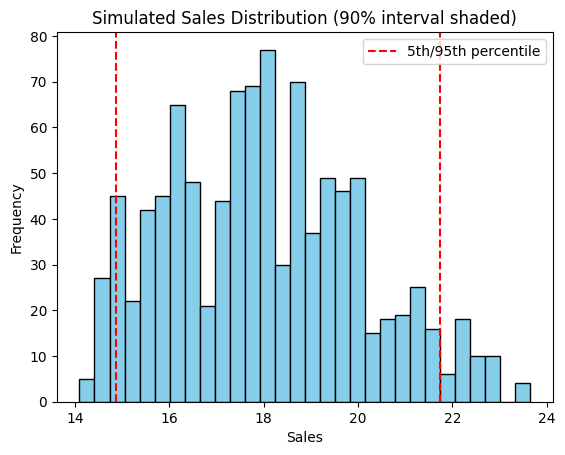

In [12]:
import matplotlib.pyplot as plt

plt.hist(simulated_sales_single, bins=30, color='skyblue', edgecolor='k')
plt.title("Simulated Sales Distribution (90% interval shaded)")
plt.axvline(lower, color='red', linestyle='dashed', label='5th/95th percentile')
plt.axvline(upper, color='red', linestyle='dashed')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Optimal budget allocation (TV, Radio, Newspaper): [33.33333333 33.33333333 33.33333333]
Predicted sales at optimal allocation:
  Mean sales: 10.70
  Median sales: 10.50
  90% interval: [7.56, 14.82]


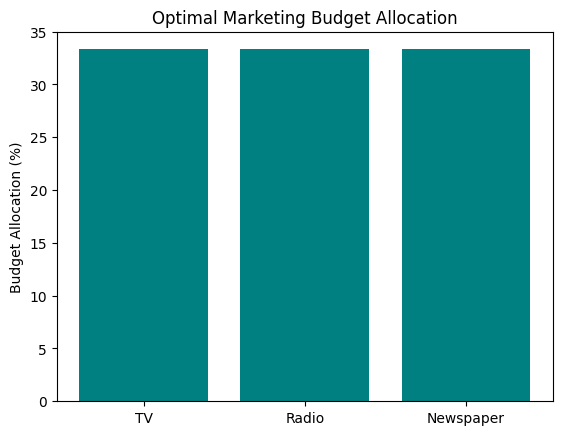

In [13]:
import numpy as np
from scipy.optimize import minimize

# Total budget for allocation
total_budget = 100

# Residuals from earlier step (model errors)
# Your residuals variable must be from the nonlinear model residuals, calculated earlier
# Example if needed:
# y_train_pred = model.predict(X_train)
# residuals = y_train - y_train_pred

# Function to predict mean simulated sales for given budget weights
def mean_simulated_sales(weights):
    # weights = [w_tv, w_radio, w_newspaper], sum to 1
    spend = np.array(weights) * total_budget

    # Convert to log scale inputs (+1 inside log for zero spend handled)
    log_spend = np.log(spend + 1)

    # Prepare input vector for prediction (shape 1x3)
    input_vec = log_spend.reshape(1, -1)

    # Predict mean sales using the model
    pred_mean = model.predict(input_vec)[0]

    # Monte Carlo: simulate residual draws and estimate mean simulated sales
    draws = np.random.choice(residuals, size=1000, replace=True)
    simulated = pred_mean + draws
    return -np.mean(simulated)  # Negative to maximize sales later via minimize()

# Constraints: weights sum to 1
constraints = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}

# Bounds: between 0.1 (10%) and 0.8 (80%) spend per channel to keep realistic allocations
bounds = [(0.1, 0.8), (0.1, 0.8), (0.1, 0.8)]

# Initial guess: equal split
initial_guess = [1/3, 1/3, 1/3]

# Run optimization
result = minimize(mean_simulated_sales, initial_guess, bounds=bounds, constraints=constraints, method='SLSQP')

optimal_weights = result.x
optimal_spend = optimal_weights * total_budget

# Calculate predicted sales and uncertainty for optimal spend
log_optimal_spend = np.log(optimal_spend + 1).reshape(1, -1)
pred_opt_mean = model.predict(log_optimal_spend)[0]
draws_opt = np.random.choice(residuals, size=1000, replace=True)
simulated_opt = pred_opt_mean + draws_opt

mean_opt = np.mean(simulated_opt)
median_opt = np.median(simulated_opt)
lower_opt = np.percentile(simulated_opt, 5)
upper_opt = np.percentile(simulated_opt, 95)

# Print results
print(f"Optimal budget allocation (TV, Radio, Newspaper): {optimal_weights*100}")
print(f"Predicted sales at optimal allocation:")
print(f"  Mean sales: {mean_opt:.2f}")
print(f"  Median sales: {median_opt:.2f}")
print(f"  90% interval: [{lower_opt:.2f}, {upper_opt:.2f}]")

# Optional: bar chart visualization
import matplotlib.pyplot as plt
channels = ['TV', 'Radio', 'Newspaper']
plt.bar(channels, optimal_weights*100, color='teal')
plt.ylabel('Budget Allocation (%)')
plt.title('Optimal Marketing Budget Allocation')
plt.show()


In [14]:
import pandas as pd
pd.DataFrame({
    'Channel': ['TV', 'Radio', 'Newspaper'],
    'Optimal %': optimal_weights*100
}).to_excel('optimal_budget_alloc.xlsx', index=False)


In [15]:
import pandas as pd

# Prepare summary dataframe
summary = pd.DataFrame({
    'Channel': ['TV', 'Radio', 'Newspaper'],
    'Optimal % Allocation': optimal_weights * 100,
    'Optimal $ Allocation': optimal_spend
})

# Add sales forecast and uncertainty as extra rows
sales_metrics = pd.DataFrame({
    'Channel': ['Predicted Mean Sales', 'Predicted Median Sales', '90% Sales Interval (Lower)', '90% Sales Interval (Upper)'],
    'Optimal % Allocation': [mean_opt, median_opt, lower_opt, upper_opt],
    'Optimal $ Allocation': ['', '', '', '']
})

# Concatenate for full report
export_report = pd.concat([summary, sales_metrics], ignore_index=True)

# Export to Excel
export_report.to_excel('optimal_budget_simulation.xlsx', index=False)
print("Excel report saved as optimal_budget_simulation.xlsx")

# Download in Colab (add these lines if you want to instantly download)
from google.colab import files
files.download('optimal_budget_simulation.xlsx')



Excel report saved as optimal_budget_simulation.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>